# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## 
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

### <span style="color:green"> Commento: </span>
<span style="color:green"> Per calcolare l'integrale sopra vengono usati due metodi Monte Carlo diversi: metodo  della media e importance sampling. Per confrontare questi due metodi consideriamo l'integranda come il prodotto di una $g(x)$ con una distribuzione di probabilità $p(x)$. </span>

<span style="color:green"> Per il metodo della media $p(x) = 1$ e $g(x)$ è proprio l'integranda di sopra. Per applicare questo metodo vengono estratti 100 numeri casuali uniformemente distribuiti per calcolare l'integranda. Per avere una stima dell'integrale si sommano questi valori e li si divide per 100 (valori estratti). Si ripete il processo 100 volte (numero di blocchi) per un totale di $10^4$ stime dell'integranda. </span>

<span style="color:green"> Per il metodo dell'importance sampling invece si sceglie una $p(x)$ che sia più simile all'integranda, per esempio $p(x) = 2(1-x)$. Se r è uniformemente distribuito in [0,1) allora $x = 1 + \sqrt{1 - r}$ è distribuita come $p(x)$. Questo perchè se si sceglie una $p(x)$ più simile all'integranda la varianza si riduce. Per applicare il metodo dell'importance sampling come sopra. </span>

<span style="color:green"> Sotto sono state stampate le stime dell'integrale del 20º blocco di entrambi i metodi. Inoltre vengono riportati i grafici delle medie progressive con i rispettivi errori dell'integrale di entrambi i metodi. Si può notare che il metodo dell'importance sampling non solo si avvicina prima al valore atteso dell'integrale ma il suo errore è 10 volte più piccolo. </span>

Stima integrale ed errore (Media) al 20º blocco
0.988592 0.0138594
Stima integrale ed errore (IS) al 20º blocco
1.00252 0.00372847


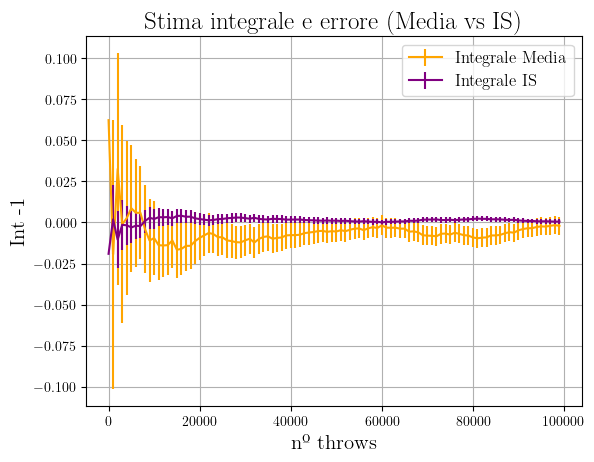

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

M = 100000 #lanci
N = 100 #blocchi
L = M/N #lanci per blocco
x = np.arange(N)

x = x*L
I, error = np.loadtxt("Esercizio02.1/Int_media.txt", usecols = (0,1), delimiter = ' ', unpack = 'true') #carico dati MC
I_IS, error_IS = np.loadtxt("Esercizio02.1/Int_IS.txt", usecols = (0,1), delimiter = ' ', unpack = 'true') #carico dati IS
print('Stima integrale ed errore (Media) al 20º blocco')
print(I[19], error[19])
print('Stima integrale ed errore (IS) al 20º blocco')
print(I_IS[19], error_IS[19])
plt.errorbar(x, I-1., yerr=error, color = 'orange', label = "Integrale Media") #plot MC
plt.errorbar(x, I_IS-1., yerr=error_IS, color = 'purple', label = "Integrale IS") #plot IS

plt.title('Stima integrale e errore (Media vs IS)', fontsize = 18)
plt.xlabel('nº throws', fontsize = 15)
plt.ylabel('Int -1', fontsize = 15)
plt.legend(frameon=True, fontsize = 12)
plt.grid(True)

plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

### <span style="color:green"> Commento: </span>
<span style="color:green"> Sotto vengono riportati due grafici che rappresentano l'andamento dei valori medi delle posizioni (dall'origine) dei random walk in funzione del numero di step $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ con i relativi errori. Per ottenere ciò è stato usato il metodo dei blocchi generando $10^4$ random walk ognuno da 100 passi. Questi sono stati divisi in 100 blocchi da 100. </span>

<span style="color:green"> Nel primo caso (discreto) i RWs sono stati generati su un reticolo cubico con passo $a = 1$. Ogni passo è un'estrazione casuale tra le tre direzioni degli assi (x, y, z) e tra l'andare avanti (+a) o indietro (-a). </span>

<span style="color:green"> Nel secondo caso (continuo) ad ogni passo ($a = 1$) viene casualmente scelta una direzione che si ottiene sfruttando le coordinate sferiche con l'estrazione di due angoli ($\theta$ e $\phi$). </span>

<span style="color:green"> In entrambi i grafici gli andamenti ottenuti vengono confrontati con la funzione $f(N)=k\sqrt{N}$ con $k = 1$ evidenziando il comportamento diffusivo del fenomeno. </span>

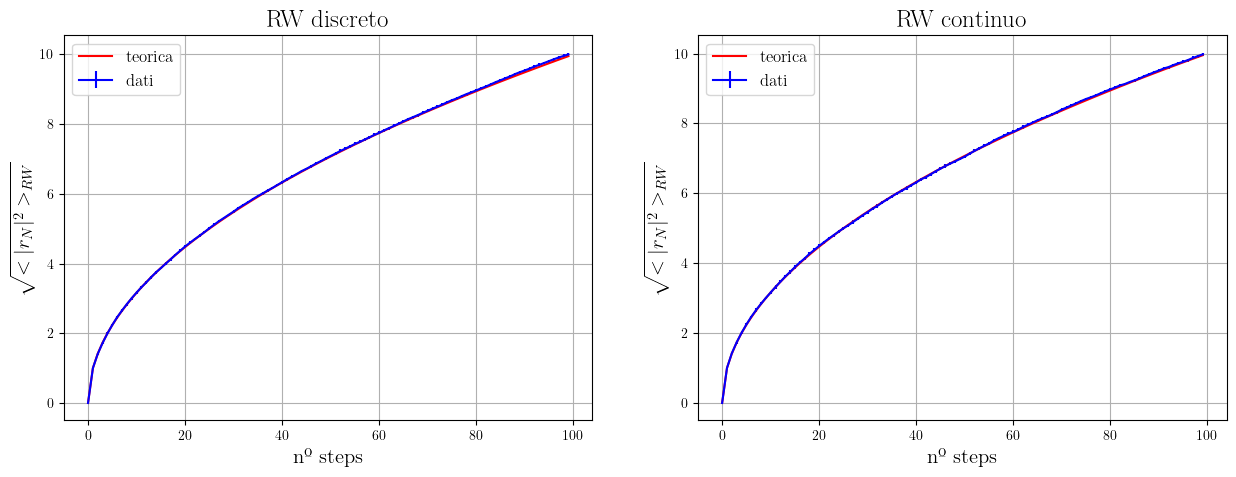

In [33]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
 
M = 10000 #RW totali
N = 100    #blocchi
L = M/N    #RW per blocco
passi = 100 #numero passi per RW
x = np.arange(passi)
f = np.sqrt(x) #funzione che descrive un comportamento diffusivo

RW, error = np.loadtxt("Esercizio02.2/RW_discreto.txt", usecols = (0,1), delimiter = ' ', unpack = 'true') #carico dati RW discreto
axes[0].errorbar(x, RW, yerr=error, label = 'dati', color = 'blue') #plot dati RW discreto
axes[0].set_title('RW discreto', fontsize = 18)
axes[0].set_xlabel('nº steps', fontsize = 15)
axes[0].set_ylabel('$\sqrt{<|r_N|^2>_{RW}}$', fontsize = 15)
axes[0].plot(x,f, label = 'teorica', color = 'red')
axes[0].legend(fontsize=12)
axes[0].grid(True)

RW1, error1 = np.loadtxt("Esercizio02.2/RW_continuo.txt", usecols = (0,1), delimiter = ' ', unpack = 'true') #carico dati RW continuo
axes[1].errorbar(x, RW1, yerr=error1, label = 'dati', color = 'blue') #plot dati RW continuo
axes[1].set_title('RW continuo', fontsize = 18)
axes[1].set_xlabel('nº steps', fontsize = 15)
axes[1].set_ylabel('$\sqrt{<|r_N|^2>_{RW}}$', fontsize = 15)
axes[1].plot(x,f, label = 'teorica', color = 'red')
axes[1].legend(fontsize=12)
axes[1].grid(True)

plt.show()